# scikit-learn-SVM-(RBF)-novelty detection

Credits: Forked from [scikit-learn.org Examples](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py) 


One-class SVM（Support Vector Machine）is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

Automatically created module for IPython interactive environment


## 1. Construct dataset 

In [4]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

## 2. OneClassSVM 

In [5]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

## 3. Visualization of results 

In [12]:
help(clf.decision_function)

Help on method decision_function in module sklearn.svm.classes:

decision_function(X) method of sklearn.svm.classes.OneClassSVM instance
    Signed distance to the separating hyperplane.
    
    Signed distance is positive for an inlier and negative for an outlier.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
    
    Returns
    -------
    dec : array-like, shape (n_samples,)
        Returns the decision function of the samples.



In [13]:
print('#xx.shape\t', xx.shape)
print('#yy.shape\t', yy.shape)

print(np.c_[xx.ravel(), yy.ravel()].shape)

#xx.shape	 (500, 500)
#yy.shape	 (500, 500)
(250000, 2)


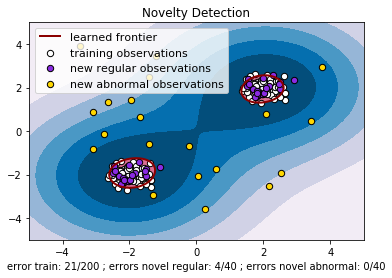

In [96]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')


b1 = plt.scatter(X_train[:, 0], 
                 X_train[:, 1], 
                 c='white', 
                 s=40, 
                 edgecolors='k')

b2 = plt.scatter(X_test[:, 0], 
                 X_test[:, 1], 
                 c='blueviolet', 
                 s=40,
                 edgecolors='k')

c = plt.scatter(X_outliers[:, 0], 
                X_outliers[:, 1], 
                c='gold', 
                s=40,
                edgecolors='k')


plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", 
            "training observations",
            "new regular observations", 
            "new abnormal observations"],
            loc="upper left",
            prop=matplotlib.font_manager.FontProperties(size=11))

plt.xlabel(
    "error train: %d/200 ; "
    "errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()